In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

In [5]:
#Importing data
link = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(link, delimiter=",")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.dropna()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
#Extract the features and target of the data. The target is the Outcome
x = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [0]:
#Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [0]:
#Split and randomise the data into training and testing dataset● Define a binary classification model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 100)

In [0]:
#Train the model
from sklearn import svm 
model = svm.SVC()
model.fit(x_train, y_train)

In [15]:
#Display the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(x_test)
print(confusion_matrix(y_test, pred))

[[124  26]
 [ 35  46]]


In [16]:
#Compute the accuracy, precision, recall and f1 score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       150
           1       0.64      0.57      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



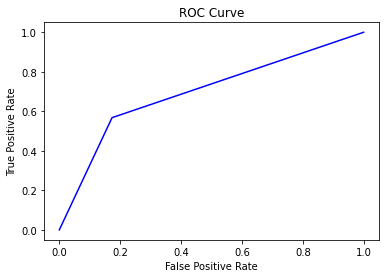

AUC Score: 0.6972839506172839


In [19]:
#Display the ROC curve and compute the AUC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr, tpr, color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, pred)
print('AUC Score:', auc_score)